In [2]:
import pandas as pd
import matplotlib as plt
import ast 

file = pd.read_csv('C:\\Users\\akash\\Downloads\\PYTHON\\data_jobs.csv')

file.job_posted_date = pd.to_datetime(file.job_posted_date)

file['job_posted_month'] = file.job_posted_date.dt.month_name()

In [3]:
# cleaning job skills -str to list 

file_new = file.copy()

file_new = file_new.dropna(subset= ['job_skills'])

file_new['job_skills'] = file_new.job_skills.apply(lambda skills: ast.literal_eval(skills) )

In [4]:
file_exploded = file_new.explode('job_skills')
#file_exploded.head(2)

In [7]:
file_exploded.groupby(['job_skills', 'job_title_short']).size().sort_values(ascending= False)

job_skills  job_title_short          
python      Data Scientist               113711
sql         Data Engineer                113130
python      Data Engineer                108022
sql         Data Analyst                  92428
            Data Scientist                78982
                                          ...  
webex       Senior Data Scientist             1
mattermost  Data Scientist                    1
clickup     Machine Learning Engineer         1
heroku      Senior Data Analyst               1
msaccess    Data Analyst                      1
Length: 2256, dtype: int64

In [10]:
file_exploded.groupby(['job_title_short', 'job_skills']).size()

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

<Axes: xlabel='job_skills,job_title_short'>

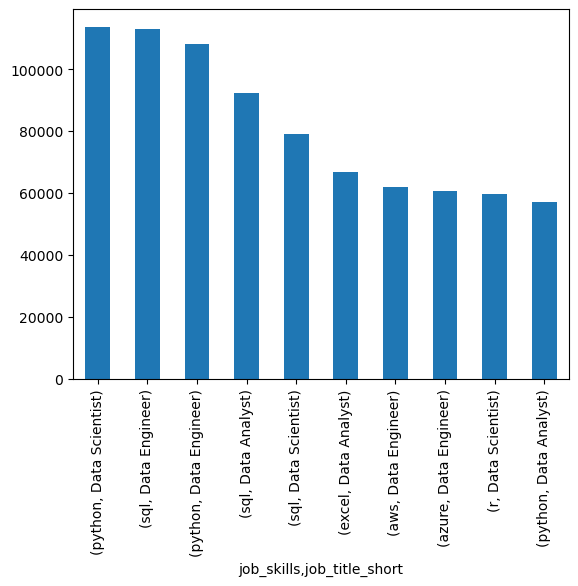

In [8]:
file_exploded.groupby(['job_skills', 'job_title_short']).size().sort_values(ascending= False).head(10).plot(kind='bar')